<a href="https://colab.research.google.com/github/muskan9887/Simpsons-Character-Classifier-using-OpenCV/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import os
import cv2
import numpy as np
import cv2
import urllib.request
from google.colab import drive
drive.mount('/content/drive/')
from google.colab.patches import cv2_imshow



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
people = ["ben_afflek","elton_john","jerry_seinfeld","madonna","mindy_kaling"]
DIR = "//content//drive//My Drive//train"

# Download the Haar Cascade XML file for face detection
url = 'https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, 'haarcascade_frontalface_default.xml')

# Load the Haar Cascade
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
features=[]
labels=[]

def create_train():
  for person in people:
    path = os.path.join(DIR,person)
    label = people.index(person)

    for img in os.listdir(path):
      img_path = os.path.join(path,img)
      img_array = cv2.imread(img_path)
      gray = cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
      faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)
      for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h,x:x+w]
        features.append(faces_roi)
        labels.append(label)
create_train()
print(len(features))
print(len(labels))

features = np.array(features,dtype='object')

face_recognizer=cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(features,np.array(labels))

face_recognizer.save('face_trained.yml')
np.save('features.npy',features)
np.save('labels.npy',labels)

100
100


In [35]:
features=np.load('features.npy',allow_pickle=True)
labels=np.load('labels.npy')

face_recognizer=cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

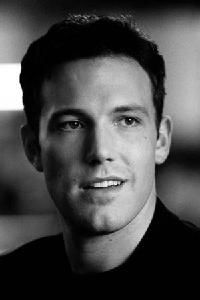

Label=jerry_seinfeld with a confidence of 68.08401901031475


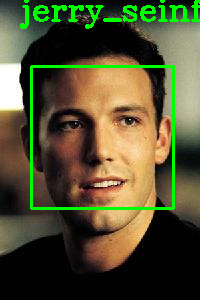

In [36]:
img=cv2.imread("/content/httpabsolumentgratuitfreefrimagesbenaffleckjpg.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)

for (x,y,w,h) in faces_rect:
  faces_roi=gray[y:y+h,x:x+w]
  label,confidence=face_recognizer.predict(faces_roi)
  print(f'Label={people[label]} with a confidence of {confidence}')
  cv2.putText(img,str(people[label]),(20,20),cv2.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img)


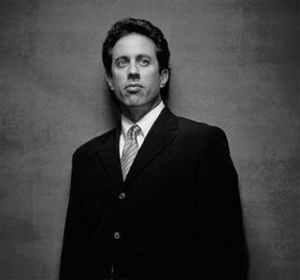

Label=jerry_seinfeld with a confidence of 0.0


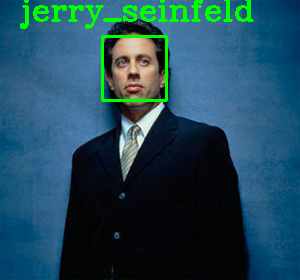

In [37]:
img=cv2.imread("/content/httpikinjaimgcomgawkermediaimageuploadsWmIuhdsrcedidjpgjpg.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)

for (x,y,w,h) in faces_rect:
  faces_roi=gray[y:y+h,x:x+w]
  label,confidence=face_recognizer.predict(faces_roi)
  print(f'Label={people[label]} with a confidence of {confidence}')
  cv2.putText(img,str(people[label]),(20,20),cv2.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img)

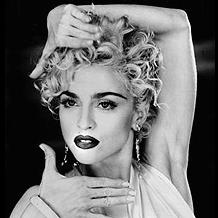

Label=madonna with a confidence of 96.81807061458018


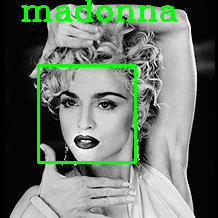

In [39]:

img=cv2.imread("/content/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

faces_rect=haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)

for (x,y,w,h) in faces_rect:
  faces_roi=gray[y:y+h,x:x+w]
  label,confidence=face_recognizer.predict(faces_roi)
  print(f'Label={people[label]} with a confidence of {confidence}')
  cv2.putText(img,str(people[label]),(20,20),cv2.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2)
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(img)